<a href="https://colab.research.google.com/github/KamronA4/My-Interests/blob/main/Sleep_Disorder_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Sleep Disorder Statistical Model
## What Features Best Predict Common Sleep Disorders?

### **Introduction**
In this project, I aim to uncover insights about lifestyle features and personal health and its relationship with sleep disorders. Using Python, data visualization, and statistical techniques, I will aim to create a model that demystifies this relationship.

This project explores patterns, trends, and predictive insights that can help those looking to improve their sleep!




## Dataset Overview

The dataset used in this project contains information on [common sleep disorders and particular lifestyle health features](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset?resource=download).

Before analysis, I shall perform data cleaning and preprocessing to ensure accurate results.


# Part I: Data description

In [ ]:
# Import libraries necessary for the project
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# First, we load our dataset. In this case, I will be using the 'Sleep Health and Lifestyle' Dataset by LAKSIKA THARMALINGAM on Kaggle.com

import kagglehub

# Download latest version
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset") # Thus we have set our dataset to a path that will be read

print("Path to dataset files:", path)

100%|██████████| 2.54k/2.54k [00:00<00:00, 3.98MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uom190346a/sleep-health-and-lifestyle-dataset/versions/2


In [ ]:
# Next, load the data

# Using the os library we can create a useable path to the file we just loaded in
import os

# Getting the file path
file_path = os.path.join(path, "Sleep_health_and_lifestyle_dataset.csv")
df = pd.read_csv(file_path)

# 1.
df.describe()

# 2. As previously stated, I am using the 'Sleep Health and Lifestyle' Dataset by LAKSIKA THARMALINGAM on Kaggle.com: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

# 3. Looking at the describe() output, I perceive our features to be Age, Gender, Sleep
# Duration, Quality of sleep, Physical Activity Level, Heart Rate, Daily Steps,
# Occupation, Physical Activity Level, BMI Category, Stress Level, Heart Rate (bpm), and Blood Pressure.
# Our target variable is Sleep Disorder.

# 4.
# Feature variables:
# Person ID: An identifier for each individual.
# Gender: The gender of the person (Male/Female).
# Age: The age of the person in years.
# Occupation: The occupation or profession of the person.
# Sleep Duration (hours): The number of hours the person sleeps per day.
# Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
# Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
# Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
# BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
# Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
# Heart Rate (bpm): The resting heart rate of the person in beats per minute.
# Daily Steps: The number of steps the person takes per day.

# Target variable:
# Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# Part II: Data cleaning

In [ ]:
# 6. Perform checks to see if there are any missing values
df.isnull().sum()

# We can see that there are 219 missing values for 'Sleep Disorder'. This is not necessarily an error, but indicates that the subject does not have a sleep disorder.
# To account for this and clear up any confusion, we can jump to answering Q9.
# 9. Handle any missing data with the proper imputation method. Justify why you chose a certain imputation method for each column.
# For 'Sleep Disorder', I will simply fill each missing value column with 'No Sleep Disorder':
df['Sleep Disorder'].fillna('No Sleep Disorder', inplace=True)
df.isnull().sum() # Check again -> No more missing values

<ipython-input-4-98d67ea70ac9>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('No Sleep Disorder', inplace=True)


,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
# 7. Perform checks to see if all columns that are supposed to be numeric or ordinal are indeed the right type
df.dtypes

# PersonID -> Ordinal (int64 works either way)
# Gender -> Nominal
# Age -> Ordinal
# Occupation -> Nominal
# Sleep Duration -> Numeric
# Quality of sleep -> Numeric
# Physical Activity Level	-> Numeric
# Stress Level	-> Numeric
# BMI Category	-> Ordinal
# Blood Pressure	-> Listed as an object, but I am unsure if this is the correct format initially.
# Heart Rate	int64 -> Numeric
# Daily Steps	int64 -> Numeric
# Sleep Disorder	object -> Nominal

# 8. Is completed below

,0
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


To better understand Blood Pressure, I looked up an article from [geeksforgeeks.org](https://www.geeksforgeeks.org/blood-pressure-analysis-gui-using-gradio-in-python/) that says the following:

> **Understanding the Problem**

> Two parameters have to be provided to the bp function that checks for the normalcy of blood pressure values. The parameters are:

> systole is the blood pressure reading measured when the heart beats

> diastole is the blood pressure reading measured when the heart rests between the beats.

> For convenience in the analysis, we assume that the above parameters are entered in mmHg units.

Now, based on the parameters, the following conclusions are reached by the function:

If systole is less than 120 mmHg and diastole is less than 80 mmHg then the message given below is returned :
“Normal Blood Pressure”
If systole lies in the range of 120-129 mmHg and diastole is less than 80 mmHg then the following message is returned:
“Elevated Blood Pressure”
If systole lies in the range of 130-139 mmHg or if diastole falls between 80-89 mmHg range then the message given below is returned
“First Stage High Blood Pressure”
If none of the conditions is satisfied then the following message is returned:
“Second Stage High Blood Pressure”

In [ ]:
# Therefore, we need to take the numerator and the denominator for each string entry in the "Blood Pressure" column and evaluate them conditionally to determine if
# the blood pressure is "Normal", "Elevated", "Frist Stage High Blood Pressure", or "Second Stage High Blood Pressure".

# First, split the systolic and diastolic pressures
df[['systolic', 'diastolic']] = (df['Blood Pressure'].str.split('/', expand=True).astype(int))

# Next, create a function that will perform these calculations and return a mx1 array that we can append as a "Blood Pressure Health" column.
def blood_pressure_health(row):
    systolic = row['systolic']
    diastolic = row['diastolic']
    if systolic < 120 and diastolic < 80:
        return 'Normal Blood Pressure'
    elif systolic >= 120 and systolic <= 129 and diastolic < 80:
        return 'Elevated Blood Pressure'
    elif systolic >= 130 and systolic <= 139 or diastolic >= 80 and diastolic <= 89:
        return 'First Stage High Blood Pressure'
    else:
        return 'Second Stage High Blood Pressure'

# Apply the function to each row of the DataFrame
df['Blood Pressure Health'] = df.apply(blood_pressure_health, axis=1)

In [ ]:
# Now we can take a quick look at Blood Pressure Health to see if things look good
df['Blood Pressure Health'].head()

,Blood Pressure Health
0,First Stage High Blood Pressure
1,First Stage High Blood Pressure
2,First Stage High Blood Pressure
3,Second Stage High Blood Pressure
4,Second Stage High Blood Pressure


In [ ]:
df['Blood Pressure Health'].value_counts()

,count
Blood Pressure Health,
First Stage High Blood Pressure,261
Second Stage High Blood Pressure,71
Normal Blood Pressure,41
Elevated Blood Pressure,1


In [ ]:
# 10. Encode any non-numeric categorical column to a numeric one for decision tree generation.
# Non-numeric categorical columns: Gender, Occupation, BMI Category, Sleep Disorder

# Conversion to numeric:
df['Gender_Numeric'] = df['Gender'].map({'Female': 0, 'Male': 1}) # FEMALE = 0, MALE = 1
df['Gender_Numeric'].value_counts()
# 10. Encode any non-numeric categorical column to a numeric one for decision tree generation.
# Non-numeric categorical columns: Gender, Occupation, BMI Category, Sleep Disorder

# Conversion to numeric:
df['Gender_Numeric'] = df['Gender'].map({'Female': 0, 'Male': 1}) # FEMALE = 0, MALE = 1
df['Gender_Numeric'].value_counts() # Good

df['BMI Category'].value_counts()
df['BMI Category_Numeric'] = df['BMI Category'].map({'Normal': 0, 'Normal Weight': 0, 'Overweight': 1, 'Obese': 2}) # NORMAL/NORMAL WEIGHT = 0, OVERWEIGHT = 1, OBESE = 2
df['BMI Category_Numeric'].value_counts() # Good

df['Sleep Disorder'].value_counts()
df['Sleep Disorder_Numeric'] = df['Sleep Disorder'].map({'No Sleep Disorder': 0, 'Sleep Apnea': 1, 'Insomnia': 2}) # NO SLEEP DISORDER = 0, SLEEP APNEA = 1, INSOMNIA = 2
df['Sleep Disorder_Numeric'].value_counts() # Good

df['Occupation'].value_counts()
df['Occupation_Numeric'] = df['Occupation'].map({'Nurse': 0, 'Doctor': 1, 'Engineer': 2, 'Lawyer': 3, 'Teacher': 4, 'Accountant': 5, 'Salesperson': 6, 'Software Engineer': 7, 'Scientist': 8, 'Sales Representative': 9, 'Manager': 10})
# NURSE = 0, DOCTOR = 1, ENGINEER = 2, LAWYER = 3, TEACHER = 4, ACCOUNTANT = 5, SALESPERSON = 6, SOFTWARE ENGINEER = 7, SCIENTIST = 8, SALES REP = 9, MANAGER = 10
df['Occupation_Numeric'].value_counts() # Good

,count
Occupation_Numeric,
0,73
1,71
2,63
3,47
4,40
5,37
6,32
7,4
8,4


# Part III: Preliminary data analysis

In [ ]:
# 12. Find the number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# 13. Use describe() and value_counts to analyze basic stats on the data set.
df.describe()

Number of rows: 374
Number of columns: 20


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,systolic,diastolic,Gender_Numeric,BMI Category_Numeric,Sleep Disorder_Numeric,Occupation_Numeric
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733,0.505348,0.449198,0.620321,2.574866
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611,0.500641,0.549274,0.805620,2.133232
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000,0.000000,0.000000,0.000000,0.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000,0.000000,0.000000,0.000000,1.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000,1.000000,0.000000,0.000000,2.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000,1.000000,1.000000,1.000000,4.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000,1.000000,2.000000,2.000000,10.000000


In [ ]:
df.value_counts()

,,,,,,,,,,,,,,,,,,,,count
Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,systolic,diastolic,Blood Pressure Health,Gender_Numeric,BMI Category_Numeric,Sleep Disorder_Numeric,Occupation_Numeric,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleep Disorder,126,83,First Stage High Blood Pressure,1,1,0,7,1
247,Male,44,Salesperson,6.3,6,45,7,Overweight,130/85,72,6000,Insomnia,130,85,First Stage High Blood Pressure,1,1,2,6,1
256,Female,45,Teacher,6.5,7,45,4,Overweight,135/90,65,6000,Insomnia,135,90,First Stage High Blood Pressure,0,1,2,4,1
255,Female,45,Teacher,6.5,7,45,4,Overweight,135/90,65,6000,Insomnia,135,90,First Stage High Blood Pressure,0,1,2,4,1
254,Female,45,Teacher,6.5,7,45,4,Overweight,135/90,65,6000,Insomnia,135,90,First Stage High Blood Pressure,0,1,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Female,37,Accountant,7.2,8,60,4,Normal,115/75,68,7000,No Sleep Disorder,115,75,Normal Blood Pressure,0,0,0,5,1
122,Female,37,Accountant,7.2,8,60,4,Normal,115/75,68,7000,No Sleep Disorder,115,75,Normal Blood Pressure,0,0,0,5,1
121,Female,37,Accountant,7.2,8,60,4,Normal,115/75,68,7000,No Sleep Disorder,115,75,Normal Blood Pressure,0,0,0,5,1


### Findings

**From the shape of the dataframe I find that there are 374 subjects with information spanning 20 rows.**

**From the desription of the dataframe, we find that the average subject is 42 years old, sleeps 7 hours a day, has normal sleep quality, exercises for an hour each day, has medium stress, a normal heart rate, and takes 6800 steps each day. I can also observe each quartile within the data distribution to gain an understanding of what the majority of the data is concentrated within, and what data would count as more of an extreme; a 60-year old who gets 9 hours of sleep, 9/10 sleep quality, exercises 2 hours each day, and is highly stressed for example would be quite an oddity in the data.**

**For the value_counts, we simply get an idea of what the data looks like on an entry-by-entry basis.**

# PART IV: Perform exploratory analysis by use of visualization

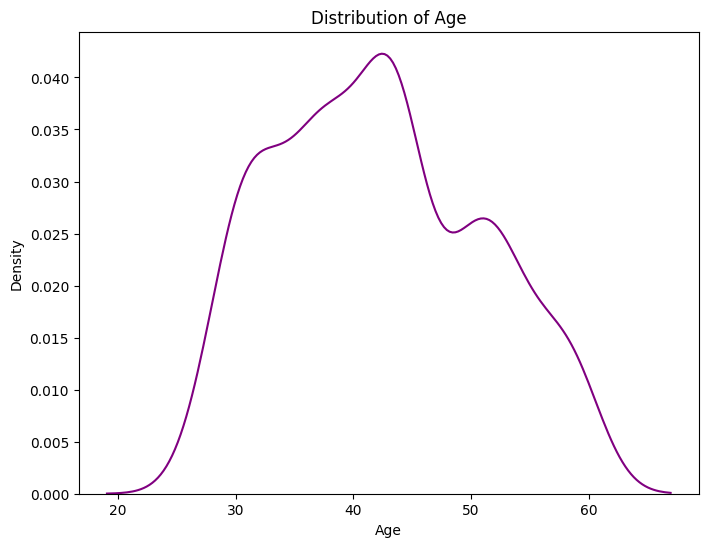

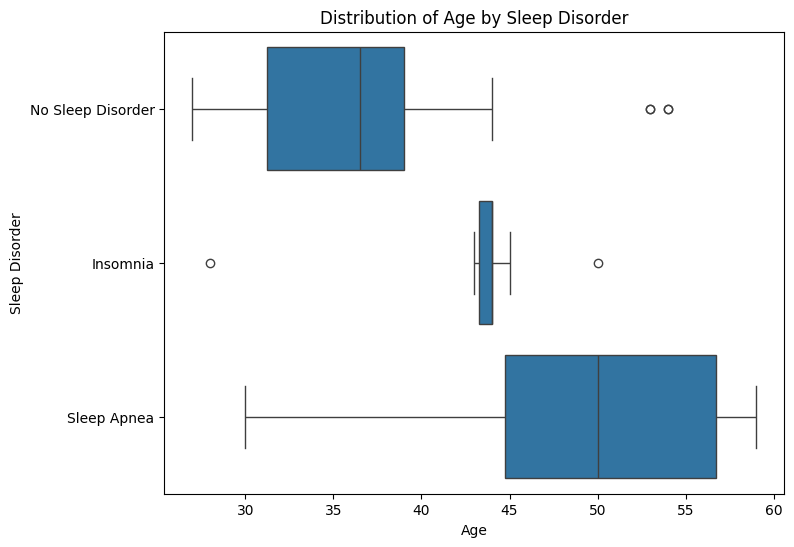

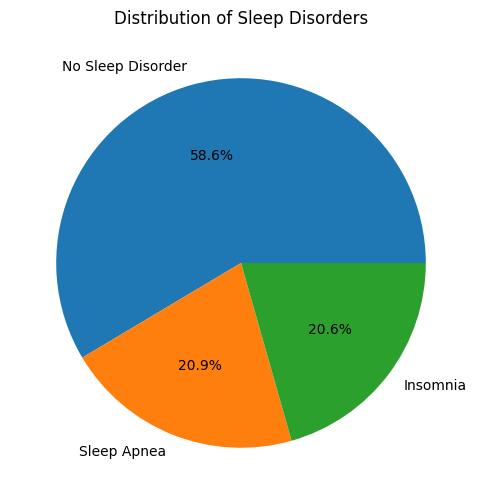

Text(0, 0.5, 'Sleep Disorder')

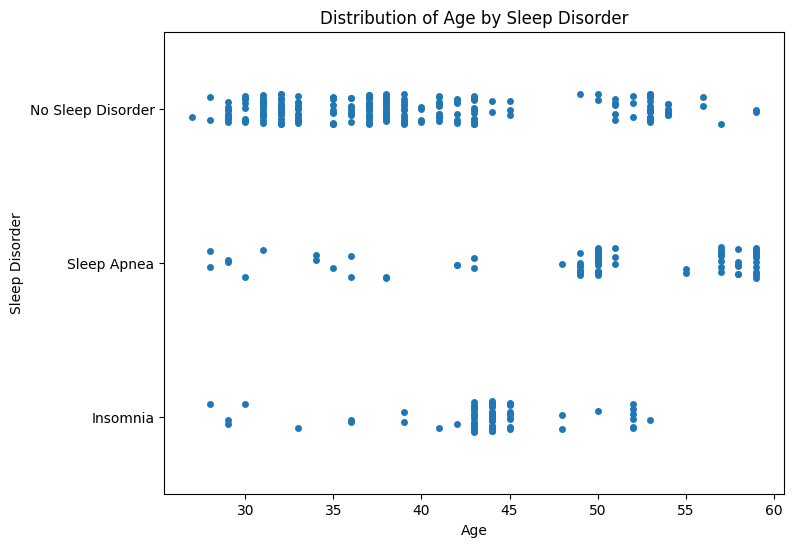

In [ ]:
# 14. Perform exploratory analysis by use of visualization scatter plots, bar graphs, pie charts, and density plots to show the distribution of key variables and the target.

from random import sample

# First, since I suspect age will be a strong predictor of sleep disorders,
# we are going to perform analysis on the variance between sleeping disorders by age

# To get an idea for how strong sampling bias would be, we can get a distribution of age.
# Density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Age'], color='purple')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# Let's draw our random sample first
sample_df = df.sample(n=min(50, len(df)), random_state=42)

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', y='Sleep Disorder', data=sample_df)
plt.title('Distribution of Age by Sleep Disorder')
plt.xlabel('Age')
plt.ylabel('Sleep Disorder')
plt.show()
# We can see that there is a ton of variance for 'Sleep apnea', meaning that age may not be a particularly strong predictor for a subject's lack of a sleep disorder.
# On the other hand, since there is little variance in 'Insomnia', age could turn out to be a strong predictor of whether or not a subject has Insomnia.

# Pie chart
plt.figure(figsize=(8, 6))
sleep_disorder_counts = df['Sleep Disorder'].value_counts()
plt.pie(sleep_disorder_counts, labels=sleep_disorder_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Sleep Disorders')
plt.show()

# Scatter plot
# In this case, it would probably be best to use a jitter plot due to the amount of data overlap
plt.figure(figsize=(8, 6))
sns.stripplot(x='Age', y='Sleep Disorder', data=df, jitter=True)
plt.title('Distribution of Age by Sleep Disorder')
plt.xlabel('Age')
plt.ylabel('Sleep Disorder')

### 15. Is this data balanced?
**No, because looking at the distribution of our target variable, we can see that the data is more strongly concentrated to one variable over the others. Furthermore, our features are also nonuniform, with the distribution of age for instance demonstrating a ~normal distribution biased towards younger ages.**

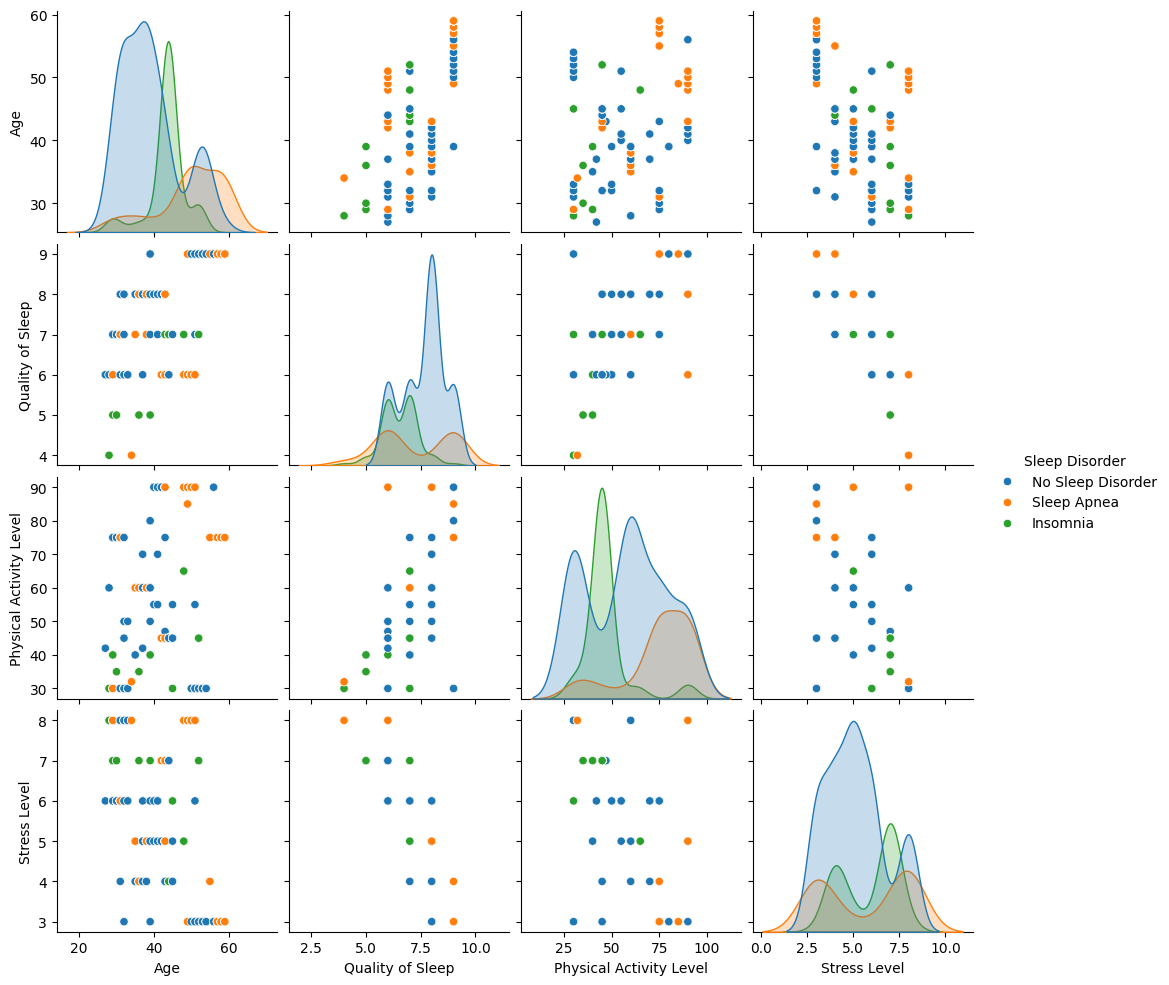

In [ ]:
# To make the size of the df more manageable, we will create df_subset based on a few key features:
df_subset = df[['Age', 'Gender', 'Blood Pressure Health', 'Occupation', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Sleep Disorder']]

# scatter matrix to show how each variable is related to other independent variables.
sns.pairplot(df_subset, hue="Sleep Disorder")

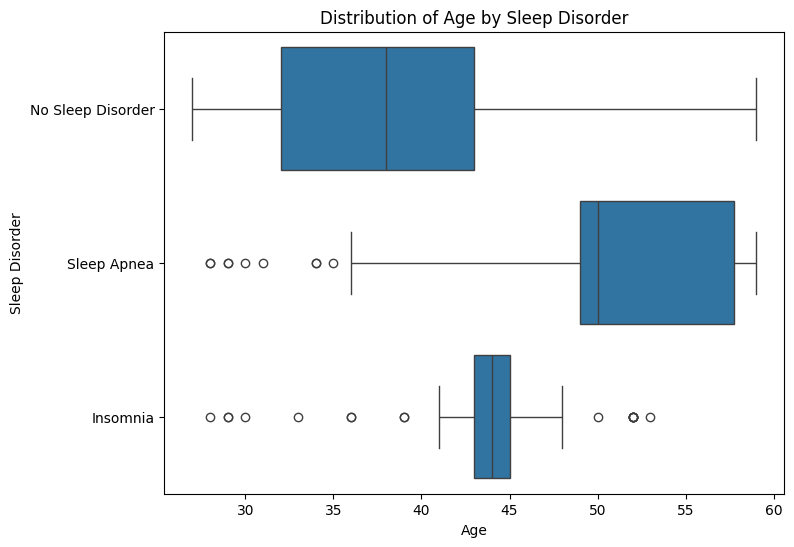

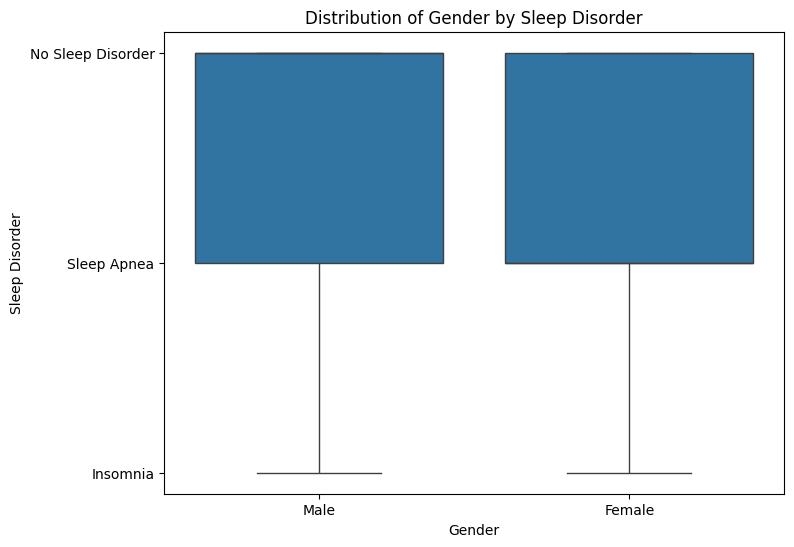

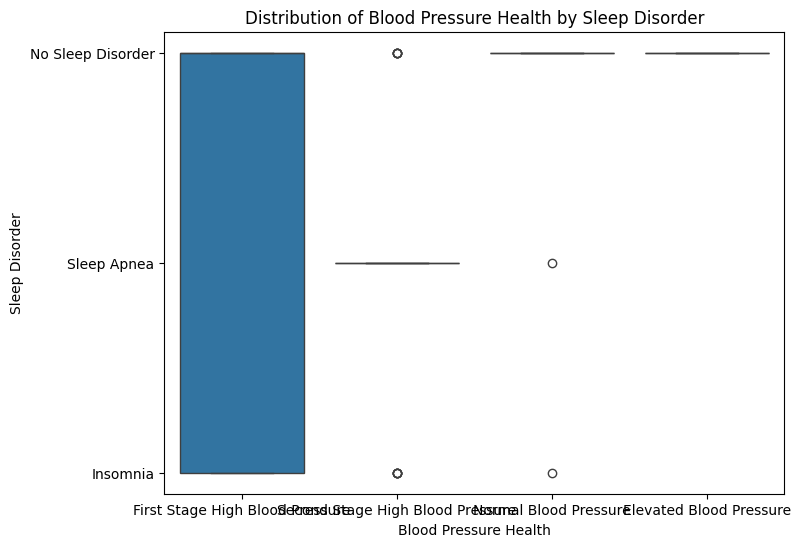

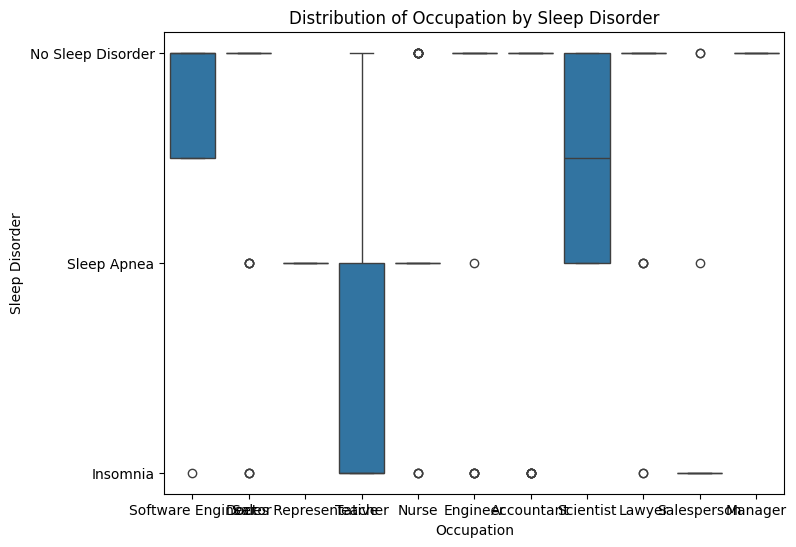

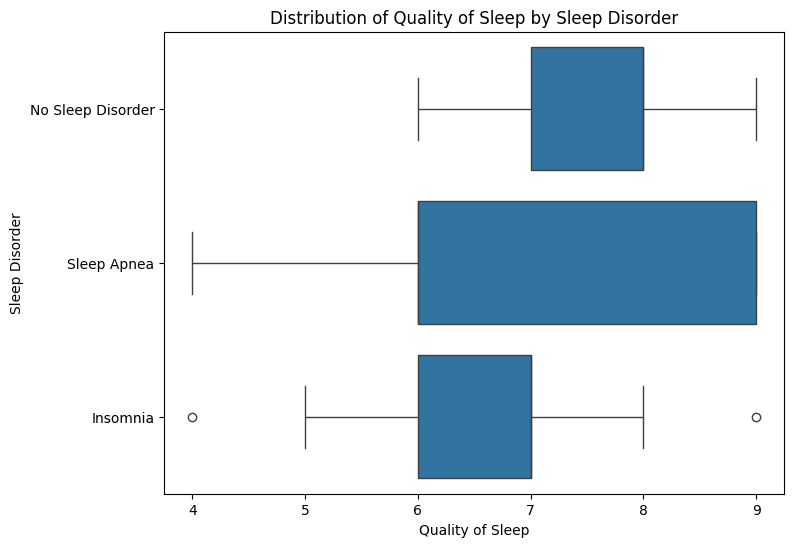

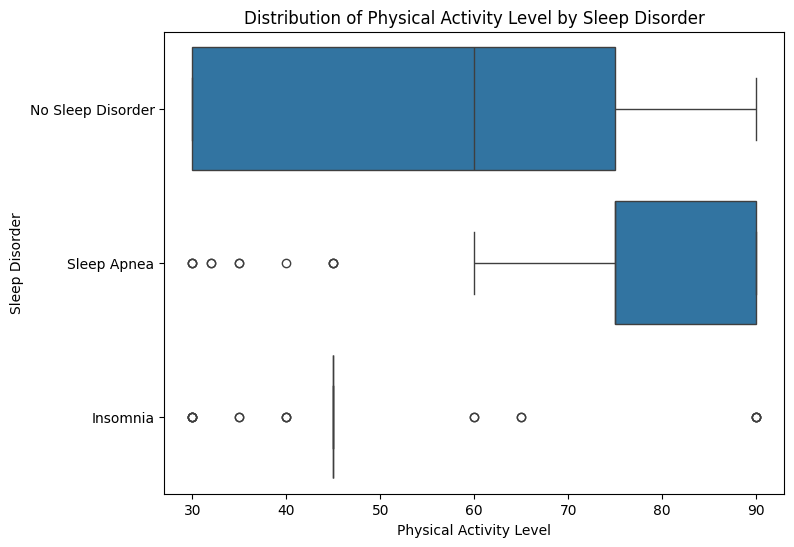

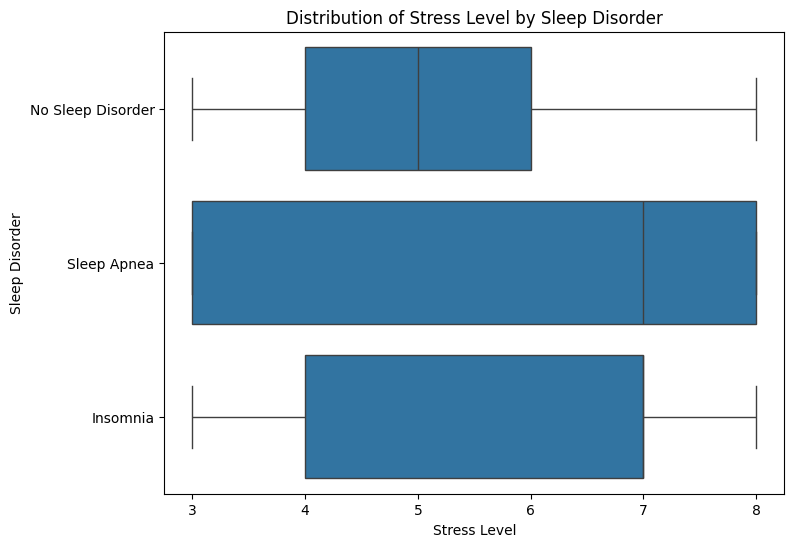

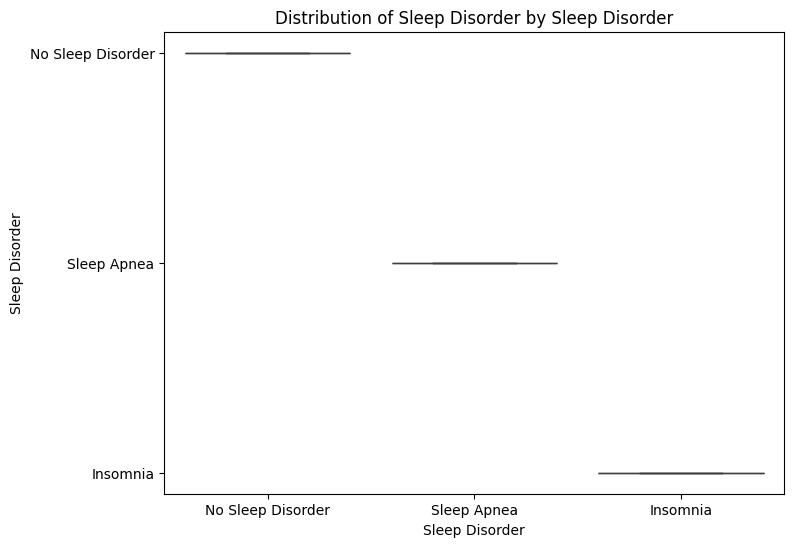

In [ ]:

# boxplot matrix to show how the key variables are related to the target. discuss your findings.
for column in df_subset.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=column, y='Sleep Disorder', data=df_subset)
    plt.title(f'Distribution of {column} by Sleep Disorder')

### Findings
**We can see pretty clearly that there are some features that predict the variance in 'Sleep Disorder' better than others. Thus, when building a model, it would be best to filter out the columns that create random, nonsensical relationships.**

**From the plots generated, I think it is fair to say the following:**
$ Var(Sleep Disorders) = Stress Level + Physical Activity Level + Quality of Sleep + Occupation + Blood Pressure Health + Age + (Error)$

# Part V: Building Models

In [ ]:
###### Set Up #####
# verify our folder with the data and module assets is installed
# if it is installed make sure it is the latest
!test -e ds-assets && cd ds-assets && git pull && cd ..
# if it is not installed clone it
!test ! -e ds-assets && git clone https://github.com/IndraniMandal/ds-assets.git
# point to the folder with the assets
home = "ds-assets/assets/"
import sys
sys.path.append(home)      # add home folder to module search path

Cloning into 'ds-assets'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 225 (delta 55), reused 50 (delta 50), pack-reused 147 (from 1)
Receiving objects: 100% (225/225), 12.69 MiB | 17.90 MiB/s, done.
Resolving deltas: 100% (81/81), done.


In [ ]:
# 18
from sklearn import tree
from treeviz import tree_print
from sklearn.metrics import accuracy_score

# Let's build an unrestricted decision tree model for "Sleep Disorder".

# General solution: Train the decision tree model and use it to answer the questions

# First, split the features from the targets.
features = df.drop(['Sleep Disorder', 'Sleep Disorder_Numeric', 'Person ID'], axis=1)
targets = df['Sleep Disorder_Numeric']

# Then, we create features and targets
X = pd.get_dummies(features)
y = targets

In [ ]:
# High complexity model
clf = tree.DecisionTreeClassifier(random_state=49)
clf = clf.fit(X, y)

# Treeprint
tree_print(clf, X)

# Accuracy score
predict_df = pd.DataFrame(clf.predict(X),
                          columns=['predicted'])

# Now we gauge the accuracy of the model:
print(f"The accuracy of this model is: {accuracy_score(y, predict_df)*100}%")

if BMI Category_Numeric =< 0.5: 
  |then if diastolic =< 85.5: 
  |  |then if Blood Pressure_130/85 =< 0.5: 
  |  |  |then if Occupation_Teacher =< 0.5: 
  |  |  |  |then if Sleep Duration =< 6.049999952316284: 
  |  |  |  |  |then if systolic =< 122.5: 
  |  |  |  |  |  |then 0
  |  |  |  |  |  |else if Age =< 32.5: 
  |  |  |  |  |  |  |then 0
  |  |  |  |  |  |  |else 0
  |  |  |  |  |else if Gender_Male =< 0.5: 
  |  |  |  |  |  |then if Age =< 36.5: 
  |  |  |  |  |  |  |then if Age =< 35.5: 
  |  |  |  |  |  |  |  |then 0
  |  |  |  |  |  |  |  |else if Sleep Duration =< 7.1499998569488525: 
  |  |  |  |  |  |  |  |  |then 0
  |  |  |  |  |  |  |  |  |else 0
  |  |  |  |  |  |  |else if Age =< 52.5: 
  |  |  |  |  |  |  |  |then 0
  |  |  |  |  |  |  |  |else if Sleep Duration =< 8.349999904632568: 
  |  |  |  |  |  |  |  |  |then if Sleep Duration =< 8.25: 
  |  |  |  |  |  |  |  |  |  |then 0
  |  |  |  |  |  |  |  |  |  |else 0
  |  |  |  |  |  |  |  |  |else 0
  |  |  |  |  |

In [ ]:
# Let's get the test score at this point
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=49)

print(f'Training score: {clf.score(X_train, y_train)}')
print(f'Testing score: {clf.score(X_test, y_test)}')

Training score: 0.939799331103679
Testing score: 0.9066666666666666


In [ ]:
# Low complexity model
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
clf = clf.fit(X, y)

# Treeprint
tree_print(clf, X)

# Accuracy score
predict_df = pd.DataFrame(clf.predict(X),
                          columns=['predicted'])

# Now we gauge the accuracy of the model:
print(f"The accuracy of this model is: {accuracy_score(y, predict_df)*100}%")

if BMI Category_Numeric =< 0.5: 
  |then if Daily Steps =< 4550.0: 
  |  |then if Age =< 29.5: 
  |  |  |then 1
  |  |  |else 1
  |  |else if systolic =< 129.0: 
  |  |  |then 0
  |  |  |else 0
  |else if Physical Activity Level =< 70.0: 
  |  |then if systolic =< 128.5: 
  |  |  |then 0
  |  |  |else 2
  |  |else if systolic =< 130.5: 
  |  |  |then 0
  |  |  |else 1
<------->
Tree Depth:  3
The accuracy of this model is: 90.9090909090909%


In [ ]:
# Next, get the test and training scores for our low complexity model

print(f'Training score: {clf.score(X_train, y_train)}')
print(f'Testing score: {clf.score(X_test, y_test)}')

Training score: 0.9130434782608695
Testing score: 0.8933333333333333


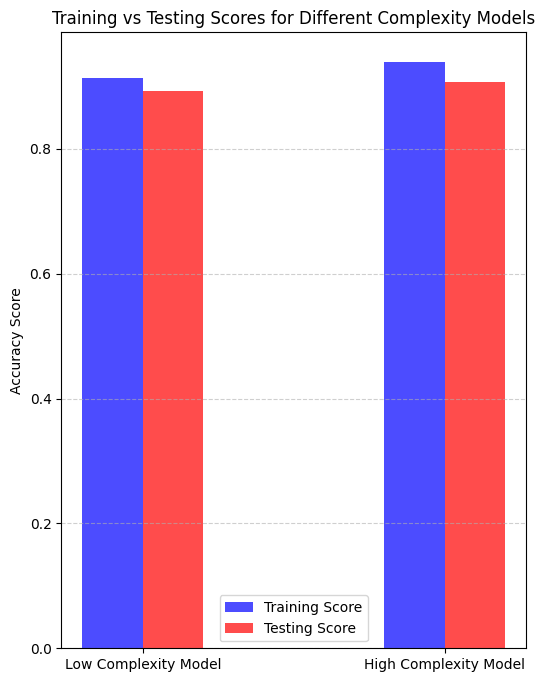

In [ ]:
# Graphically compare the Train and Test scores of each model to identify which model is overfitting.
models = ["Low Complexity Model", "High Complexity Model"]

train_scores = [0.9130, 0.9398]  # Low complexity, High complexity
test_scores = [0.8933, 0.9067]    # Low complexity, High complexity

# Bar chart
import numpy as np # get np.arange()
x = np.arange(len(models))
plt.figure(figsize=(6,8))
plt.bar(x - 0.1, train_scores, width=0.2, label="Training Score", color='blue', alpha=0.7)
plt.bar(x + 0.1, test_scores, width=0.2, label="Testing Score", color='red', alpha=0.7)

plt.xticks(x, models)
plt.ylabel("Accuracy Score")
plt.title("Training vs Testing Scores for Different Complexity Models")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.show()


### Discussion on why one of the models is overfitting.
**Since the high complexity model has a more significantly higher training score than its testing score, it is reasonable to infer that it is the model that is overfitting (in this case, overfiting the most).**

### What can be done to prevent overfitting?
**To prevent overfitting, we need to reduce the depth of the decision tree. This helps make sure that the decision tree isn't training itself on noise.**


### Discussion on how the low complexity model is underfitting and why
**The reason why the low complexity model is underfitting can most easily be divined from its 100% accuracy score (that is, when including 'Person ID' - we can conclude that the rest of the variance is based on our removal of this variable. Since 'Person ID' has nothing to do with actually predicting Sleep Disorder and it accounts for the rest of the variance in this tree, we know that even when it is excluded the model is overfitting). There is a degree of variance that should be completely intangible to the data that we have captured, meaning the 100% score is the result of the model training itself on noise.**

### Low complexity model
**The low complexity model makes 7 comparisons.**

### What decisions can be made by the low complexity model?
1. Is a subject normal weight?
2. Does the subject take less than 4550 steps each day?
3. Does the subject exercise for less than 70 hours each day?
4. Is the subject under 30 years old?
5. Is the subject's systolic blood pressure in a healthy zone? (also 6. and 7.)


# Part VI: Perform a Model Search to find the best medium-complexity model

In [ ]:
# 25. Perform a model search to find the best medium-complexity model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X, y)
tree_print(grid_search.best_estimator_, X)

# 26. Perform grid search with cross-validation
from sklearn.model_selection import cross_val_score

best_model = grid_search.best_estimator_  # Best model from Q25
cv_scores = cross_val_score(best_model, X, y, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean()}")

# Train-test scores:
print(f'Train Score: {grid_search.score(X_train, y_train)}')
print(f'Test Score: {grid_search.score(X_test, y_test)}')

if BMI Category_Numeric =< 0.5: 
  |then if diastolic =< 85.5: 
  |  |then if Age =< 32.5: 
  |  |  |then 0
  |  |  |else 0
  |  |else if Physical Activity Level =< 37.5: 
  |  |  |then 1
  |  |  |else 1
  |else if Physical Activity Level =< 70.0: 
  |  |then if systolic =< 128.5: 
  |  |  |then 0
  |  |  |else 2
  |  |else if diastolic =< 85.5: 
  |  |  |then 0
  |  |  |else 1
<------->
Tree Depth:  3
Cross-validation scores: [0.69333333 0.69333333 1.         0.97333333 0.83783784]
Mean accuracy: 0.8395675675675676
Train Score: 0.9130434782608695
Test Score: 0.8933333333333333


In [ ]:
# 27. What is the optimal classifier and the best sets of hyper-parameters for the model?
print(grid_search.best_params_)
print(grid_search.best_estimator_)

# Optimal classifier: Entropy
# Best sets of hyper-params: Criterion: Entropy, Max Depth: 3, Min samples split: 2

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
DecisionTreeClassifier(criterion='entropy', max_depth=3)


### 28. Note
**The reason why I have performed cross-validiation is for the sake of reducing bias in the data from a particular train-test split. This implies less overfitting as well as a better prediction of the model's accuracy.**

### Processes 29. 30. and 31.
Cross-validation scores:
> 0.69333333, 0.69333333, 1, 0.97333333, 0.83783784

Mean accuracy:
> 0.8395675675675676

Best model:

**Low Complexity Model**
> Training Accuracy: 0.9130
> Testing Accuracy: 0.8933


**Medium Complexity Model**
> Training Accuracy: 0.9130434782608695
> Testing Accuracy: 0.8933333333333333


**High Complexity Model**
> Training Accuracy: 0.9398
> Testing Accuracy: 0.9067

Each of the models performs similarly well in testing, however since the **medium complexity model** is trained the best, I assume that as the size of data increases it will prove to be the best predictor.

# Part VII: 10% Worse

In [ ]:
# 32.
# Target score: .9067 - .1000 = .8067
# Since changing the parameters of our tree either over or underadjusted for the target accuracy, I am going to reduce the number of features instead.
ten_percent_worse_model = tree.DecisionTreeClassifier(max_depth=2, min_samples_split=2,
    max_features=int(X.shape[1] * 0.25),  # Only use 25% of the features
    random_state=42)

ten_percent_worse_model.fit(X_train, y_train)
accuracy_worse = ten_percent_worse_model.score(X_test, y_test)
print(f"Accuracy: {accuracy_worse}") # This is pretty much as close as it gets

Accuracy: 0.84


### 33.
**This model is trained on less data and even tighter restrictions on its depth, leaving it less likely to be able to deal with new data it runs into.**

### 34.
**Since the model has decreased in accuracy, we can say that some combination of the lost depth and lost training data accounts for this drop. This reveals that the data we use to train the model does actually help account for the variance in our data, and it can be predicted.**

In [ ]:
# 35. Perform model evaluation on the medium complexity model and ten_percent_worse_model using the following metrics: accuracy score, balanced accuracy score, precision, recall, confusion matrices
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, confusion_matrix

# Predictions
y_pred_medium = grid_search.best_estimator_.predict(X_test)
y_pred_worse = ten_percent_worse_model.predict(X_test)

# List metrics for accuracy, balanced accuracy, precision, recall
metrics = [
    ('Accuracy Med', accuracy_score(y_test, y_pred_medium)),
    ('Accuracy Worse', accuracy_score(y_test, y_pred_worse)),
    ('Balanced Accuracy Med', balanced_accuracy_score(y_test, y_pred_medium)),
    ('Balanced Accuracy Worse', balanced_accuracy_score(y_test, y_pred_worse)),
    ('Precision Med', precision_score(y_test, y_pred_medium, average='weighted')),
    ('Precision Worse', precision_score(y_test, y_pred_worse, average='weighted')),
    ('Recall Med', recall_score(y_test, y_pred_medium, average='weighted')),
    ('Recall Worse', recall_score(y_test, y_pred_worse, average='weighted'))
    ]

for i in metrics:
    print(i)

print("\n")

# Confusion Matrix
print('Confusion Matrix (Medium Complexity):\n', confusion_matrix(y_test, y_pred_medium))
print('Confusion Matrix (10% Worse Model):\n', confusion_matrix(y_test, y_pred_worse))

# 36. Using the matrices find which one produces the highest number of false negatives
# False negatives Occur you have [Confusion Matrix][1,0]
cm_medium = confusion_matrix(y_test, y_pred_medium)
cm_worse = confusion_matrix(y_test, y_pred_worse)

false_negatives_medium = cm_medium[1, 0]
false_negatives_worse = cm_worse[1, 0]

print(f"False Negatives (Medium Complexity): {false_negatives_medium}")
print(f"False Negatives (10% Worse Model): {false_negatives_worse}") # both produce just 1.

('Accuracy Med', 0.8933333333333333)
('Accuracy Worse', 0.84)
('Balanced Accuracy Med', 0.8587980646804176)
('Balanced Accuracy Worse', 0.8242933537051185)
('Precision Med', 0.8917222222222222)
('Precision Worse', 0.8590933727519092)
('Recall Med', 0.8933333333333333)
('Recall Worse', 0.84)


Confusion Matrix (Medium Complexity):
 [[42  0  2]
 [ 1 12  1]
 [ 2  2 13]]
Confusion Matrix (10% Worse Model):
 [[38  0  6]
 [ 1 11  2]
 [ 2  1 14]]
False Negatives (Medium Complexity): 1
False Negatives (10% Worse Model): 1


### What can be the impact of a false negative in this case?
**A false negative diagnosis in this case can be very misleading for a patient. This is because a patient who has a sleep disorder could be diagnosed as healthy, which discourages them from seeking treatment. Therefore, it would be optimal to keep false negatives to a minimum.**

### 38. Compare the medium complexity model and ten_percent_worse_model.

Medium Complexity:
> Training, Testing Accuracy: 91.3%, 89.3%
> False Negatives: 1

ten_percent_worse:
> Training, Testing Accuracy: 84%, 84%
> False Negatives: 1

### 39. Which model is more complex?
The medium complexity model.

### 40. What is the 95% confidence interval of each model?

In [ ]:
# 40.
def classification_confint(acc, n):
    '''
    Compute the 95% confidence interval for a classification problem.
      acc -- classification accuracy
      n   -- number of observations used to compute the accuracy
    Returns a tuple (lb,ub)
    '''
    import math
    interval = 1.96*math.sqrt(acc*(1-acc)/n)
    lb = max(0, acc - interval)
    ub = min(1.0, acc + interval)
    return (lb,ub)

medium_confint = classification_confint(accuracy_score(y_test, y_pred_medium), len(y_test))
worse_confint = classification_confint(accuracy_score(y_test, y_pred_worse), len(y_test))

print(f'Medium Complexity Model Confidence Interval: {medium_confint}')
print(f'Difference: {medium_confint[1] - medium_confint[0]}')
print("\n")
print(f'10% Worse Model Confidence Interval: {worse_confint}')
print(f'Difference: {worse_confint[1] - worse_confint[0]}')

Medium Complexity Model Confidence Interval: (0.823470439457251, 0.9631962272094157)
Difference: 0.1397257877521647


10% Worse Model Confidence Interval: (0.7570292388850144, 0.9229707611149855)
Difference: 0.16594152222997116


### 41.
**After looking through differences between the two, I believe that it is better to choose the medium complexity model after all. Although the 10% worse model likely generalizes better due to lower accuracy and higher confidence, the decrease in accuracy over a large enough sample size would give way to too many false negatives, which could become problematic.**


## **Key Findings & Insights**
- There is a significant correlation between certain lifestyle and health factors and ones propensity to sleep disorders.
- Creating a model based on this data, we were able to predict with ~90% accuracy whether a subject in the dataset had a sleep disorder.

## **Next Steps**
For future work, I can enhance this project by:
- Incorporating *more* datasets to validate findings
- Applying more sophisticated machine learning models for predictive analysis
- Exploring deeper statistical techniques

---
**Author:** Kamron Aggor
